# Tomato leaf disease detection using Tensorflow

**Tomato leaf has nine different diseases such as,Target spot, Tomato mosaic virus, Tomato yellow leaf curl virus, Bacterial spot, Early blight, Late blight, Leaf mold, Septoria leaf spot and Spider mites two spotted spider mite. This project aims to detect the disease in the tomato leaf image and classify the image into ten different classes using Tensorflow.**

**The datasets for this project is available in the website Kaggle 'https://www.kaggle.com/arjuntejaswi/plant-village'.**

## Importing required libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

import numpy as np

In [3]:
!pip install --upgrade tensorflow

^C


In [7]:
!pip install tf-nightly

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

## Loading the Images data as batches to tensorflow dataset

**The API tf.keras.preprocessing.image_dataset_from_directory(main_directory, labels = 'inferred') will return a tf.data.Dataset that yields the batches of images from the subdirectories together with the labels.** 

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
            "PlantVillage",
            shuffle = True,
            image_size = (IMAGE_SIZE,IMAGE_SIZE),
            batch_size = BATCH_SIZE
)

Found 16011 files belonging to 10 classes.
  Attempting uninstall: tf-estimator-nightly
    Found existing installation: tf-estimator-nightly 2.9.0.dev2022010709
    Uninstalling tf-estimator-nightly-2.9.0.dev2022010709:
      Successfully uninstalled tf-estimator-nightly-2.9.0.dev2022010709
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\britt\\AppData\\Local\\Temp\\pip-uninstall-70hvsi2z\\python\\framework\\_dtypes.pyd'
Consider using the `--user` option or check the permissions.



**Displaying the 10 class names.**

In [5]:
class_names = dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
class_dict = {}
count  = 0
for names in class_names:
    class_dict[names] = count
    count = count + 1
class_dict
    

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [6]:
len(dataset)

501

**Displaying a batch of data. It has 32 images, with each image a size of 256 by 256 and 3 is RGB channels.**

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[6 2 0 2 9 6 6 4 9 6 4 3 7 7 2 2 9 0 4 3 8 2 0 7 9 8 7 6 7 5 5 5]


**Showing the first image in the batch. The numpy array is between 0 to 255.**

In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[198. 193. 197.]
  [191. 186. 190.]
  [202. 197. 201.]
  ...
  [166. 160. 170.]
  [166. 160. 170.]
  [143. 137. 147.]]

 [[198. 193. 197.]
  [193. 188. 192.]
  [204. 199. 203.]
  ...
  [153. 147. 157.]
  [154. 148. 158.]
  [157. 151. 161.]]

 [[192. 187. 191.]
  [188. 183. 187.]
  [202. 197. 201.]
  ...
  [163. 157. 167.]
  [162. 156. 166.]
  [153. 147. 157.]]

 ...

 [[111. 100. 104.]
  [115. 104. 108.]
  [114. 103. 107.]
  ...
  [123. 114. 119.]
  [115. 106. 111.]
  [108.  99. 104.]]

 [[122. 111. 115.]
  [117. 106. 110.]
  [120. 109. 113.]
  ...
  [145. 136. 141.]
  [113. 104. 109.]
  [109. 100. 105.]]

 [[126. 115. 119.]
  [ 92.  81.  85.]
  [101.  90.  94.]
  ...
  [123. 114. 119.]
  [130. 121. 126.]
  [ 97.  88.  93.]]]


**The shape of the first image is shown below.**

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


**Visualising 12 images from the the batch of 32 images with their class names.**

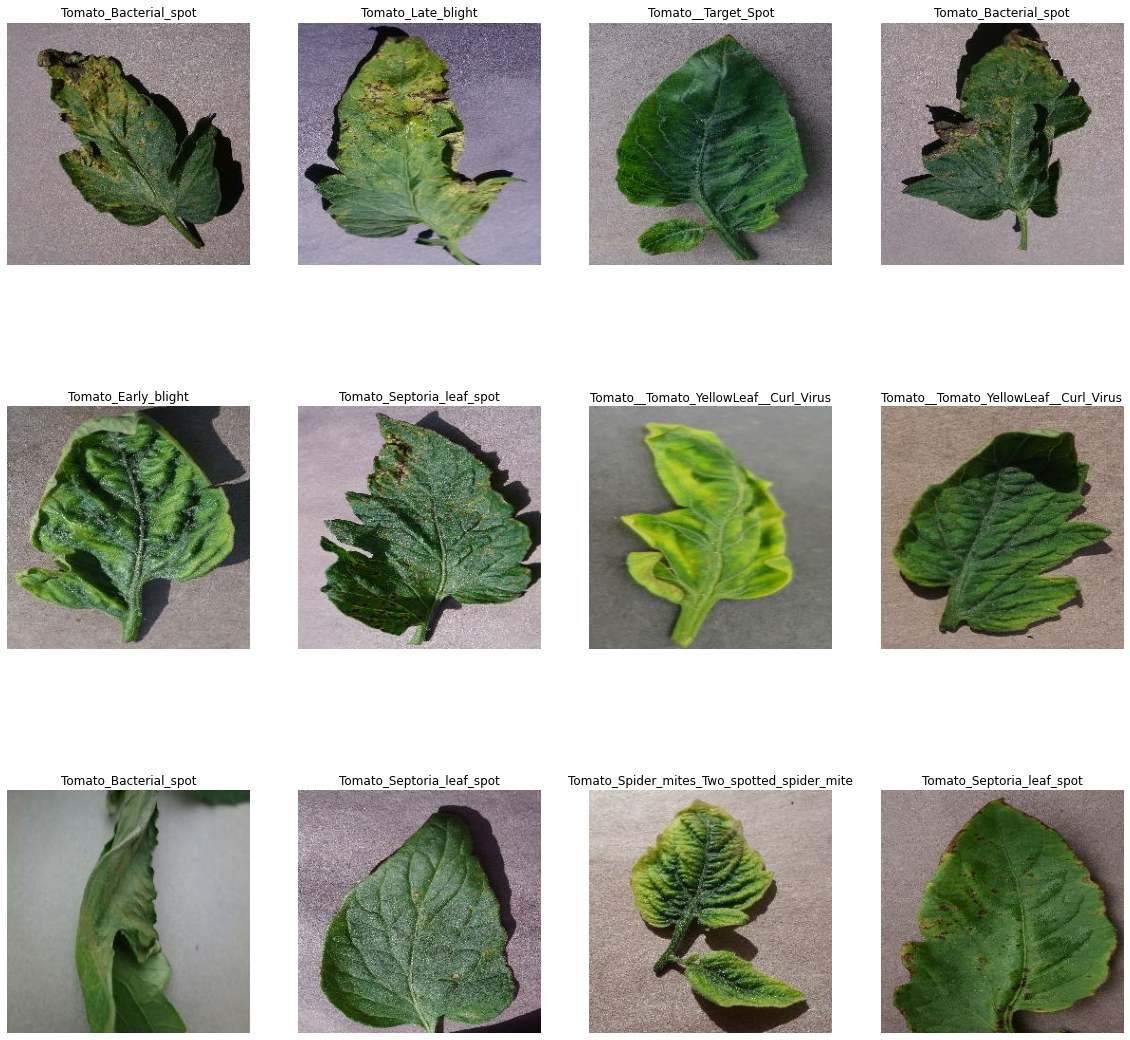

In [10]:
plt.figure(figsize=(20,20))
for image_batch, label_image in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.title(class_names[label_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

## Splitting the dataset 

**Length of the dataset is 501. From this 80% of the data will be used for training, 10% of the remaining data will be used for validation and the final 10 % of the data will be used for testing the model.**

In [11]:
train_size = 0.8
len(dataset)*train_size

400.8

In [12]:
train_ds = dataset.take(400)
len(train_ds)

400

In [13]:
test_ds = dataset.skip(400)
len(test_ds)

101

In [14]:
val_size = 0.1
len(dataset)*val_size

50.1

In [15]:
val_ds = test_ds.take(50)
len(val_ds)

50

In [16]:
test_ds = test_ds.skip(50)
len(test_ds)

51

**get_dataset_partition() is a function that shuffles the dataset and splits the dataset into training, validation and testing the model.**

In [17]:
def get_dataset_partition(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size =1000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds1 = ds.take(train_size)
    val_ds1 = ds.skip(train_size).take(val_size)
    test_ds1 = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
    

In [18]:
train_ds, val_ds, test_ds = get_dataset_partition(dataset)

In [19]:
print("Length of training datset : ",len(train_ds))
print("Length of the validation dataset : ",len(val_ds))
print("Lenght of the test dataset : ",len(test_ds))


Length of training datset :  400
Length of the validation dataset :  50
Lenght of the test dataset :  51


### Cache, Shuffle and Prefetch the dataset 

**cache() function here reads the image from the disk and stores in the memory. The next iteration will reuse the images cached during the cache transformation.**

**prefetch() function is used to decouple the time when data is produced from the time when data is consumed. The transformation uses a background thread and an internal buffer to prefetch elements from the input dataset ahead of the time they are requested.**

**AUTOTUNE, which will prompt the tf. data runtime to tune the value dynamically at runtime.**

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

## Scaling the Image 

In [21]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

## Data Augmentation

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

### Applying Data Augmentation to Train Dataset

In [ ]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

## Model Building using Convolutional Neural Network (CNN) 

**Using a CNN coupled with a Softmax activation in the output layer. Also added resizing, normalization and Data Augmentation as the initial layers.**

In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])

model.build(input_shape = input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

### Compiling the Model

**Using adam Optimizer, SparseCategoricalCrossentropy for losses and accuracy as a metric.**

In [25]:
model.compile(
        optimizer = 'adam',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
        metrics = ['accuracy']
)

In [26]:
history = model.fit(
        train_ds,
        epochs = EPOCHS,
        batch_size = BATCH_SIZE,
        verbose = 1,
        validation_data = val_ds
)

Epoch 1/50
400/400 [==============================] - 879s 2s/step - loss: 1.7186 - accuracy: 0.3812 - val_loss: 1.4993 - val_accuracy: 0.4481
Epoch 2/50
400/400 [==============================] - 766s 2s/step - loss: 1.2104 - accuracy: 0.5803 - val_loss: 1.3222 - val_accuracy: 0.5581
Epoch 3/50
400/400 [==============================] - 717s 2s/step - loss: 0.9120 - accuracy: 0.6865 - val_loss: 1.5688 - val_accuracy: 0.5525
Epoch 4/50
400/400 [==============================] - 713s 2s/step - loss: 0.7329 - accuracy: 0.7370 - val_loss: 0.8907 - val_accuracy: 0.6800
Epoch 5/50
400/400 [==============================] - 708s 2s/step - loss: 0.5918 - accuracy: 0.7930 - val_loss: 0.8178 - val_accuracy: 0.7525
Epoch 6/50
400/400 [==============================] - 699s 2s/step - loss: 0.5198 - accuracy: 0.8203 - val_loss: 1.3854 - val_accuracy: 0.6025
Epoch 7/50
400/400 [==============================] - 694s 2s/step - loss: 0.4368 - accuracy: 0.8507 - val_loss: 0.7208 - val_accuracy: 0.7619

In [29]:
scores = model.evaluate(test_ds)

51/51 [==============================] - 18s 359ms/step - loss: 0.1210 - accuracy: 0.9609


In [30]:
scores

[0.12095198780298233, 0.9608938694000244]

### The training accuracy is 0.97 and the testing accuracy is 0.96

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the Accuracy and Loss for both Training and Validation

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

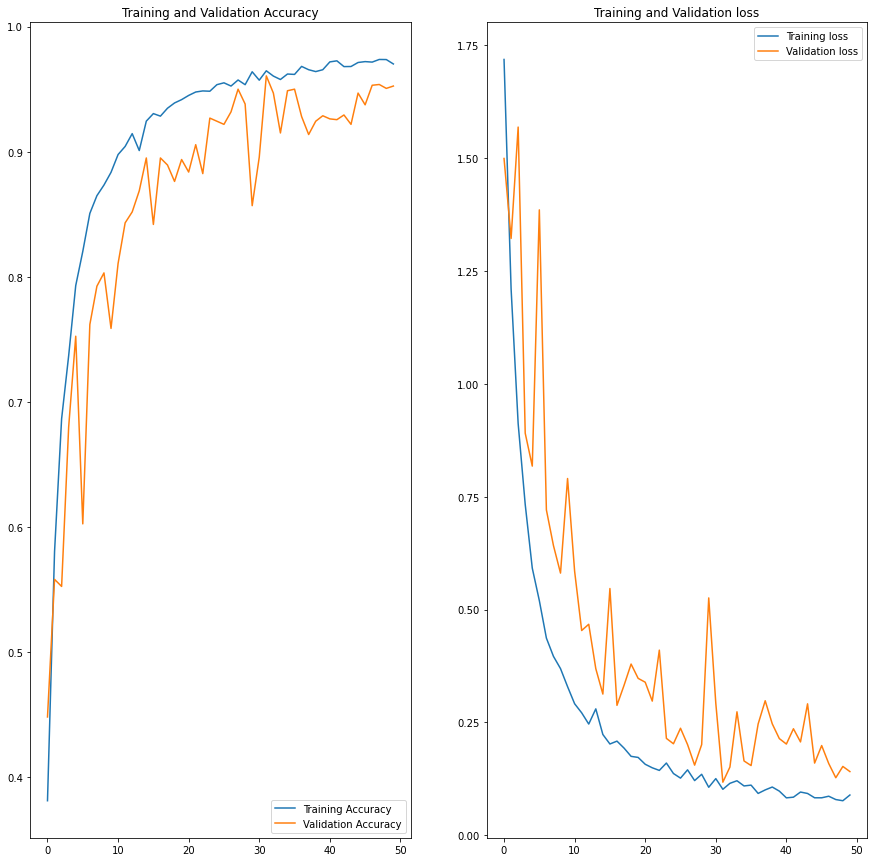

In [45]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label= 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')
plt.show()

**The above Training and Validation Accuracy graph shows that with the increase in the Training accuracy there is a increase in the Validation accuracy.**

**From the Training and the Validation loss graph, it shows that with the decrease in the training loss there is a decrease in the validation loss.**

### Predicting an image

Actual label :  Tomato_Septoria_leaf_spot
Predicted label :  Tomato_Septoria_leaf_spot


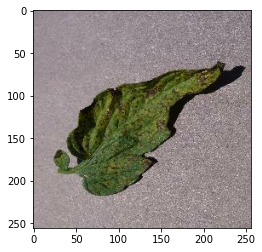

In [34]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("Actual label : ", class_names[first_label])
    plt.imshow(first_image)
    
    batch_prediction = model.predict(images_batch)
    print("Predicted label : ", class_names[np.argmax(batch_prediction[0])])

**predict() function is used to predict the images and it provides the Predicted class name with the Confidence.**

In [35]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

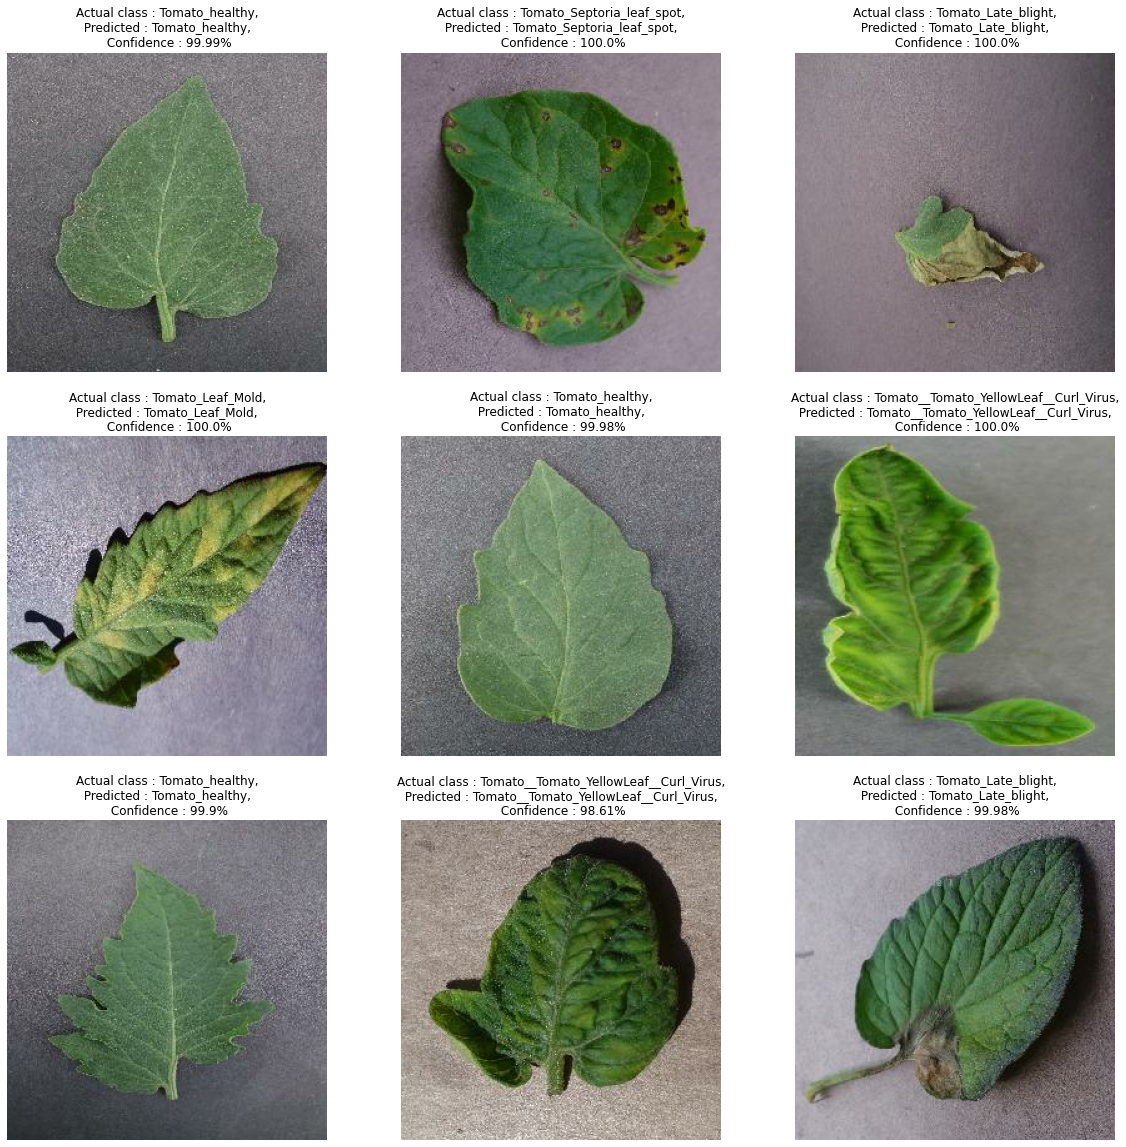

In [43]:
plt.figure(figsize=(20,20))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual class : {actual_class},\n Predicted : {predicted_class}, \n Confidence : {confidence}%")
        plt.axis("off")

**The output clearly shows that the model is able to predict all the images correctly and the model performanace is significant.** 

## Saving the model and the Class names

In [51]:
model.save('saved_model.h5')

In [8]:
import json
with open("class_names.json","w") as f:
    f.write(json.dumps(class_dict))
    

In [55]:
reloaded_model = tf.keras.models.load_model('saved_model.h5')

In [56]:
reloaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  